# Feature Selection

In [52]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [53]:
data = pd.read_csv("final_categorized.csv",index_col='Slno')
X = data.iloc[:,1:]  #independent columns
y = data.iloc[:,0]    #target column 

In [54]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(34,'Score'))  #print 10 best features


           Specs       Score
15       Slope_E  124.000000
32       Depth_E  122.000000
27    Drainage_C  119.000000
24       Rocky_C  117.000000
21      Gravel_C  117.000000
18     Erosion_C  117.000000
14       Slope_D  117.000000
30       Depth_C  115.000000
17     Erosion_B  110.000000
23       Rocky_B  110.000000
20      Gravel_B  110.000000
13       Slope_C  110.000000
31       Depth_D  107.000000
4      Texture_s   89.400000
26    Drainage_B   78.200000
25    Drainage_A   50.297297
0      Texture_c   33.050000
19      Gravel_A   28.000000
22       Rocky_A   28.000000
16     Erosion_A   28.000000
3     Texture_ls   27.775000
10    Texture_sl   20.250000
7    Texture_sic   18.500000
28       Depth_A   17.000000
29       Depth_B   17.000000
12       Slope_B   14.000000
11       Slope_A   14.000000
5     Texture_sc   13.730000
9    Texture_sil   10.342857
2      Texture_l   10.342857
6    Texture_scl    9.120000
8   Texture_sicl    8.092857
1     Texture_cl    5.270588


C:\Users\lavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.01873823 0.0128679  0.0102339  0.04273734 0.02448128 0.03902204
 0.01699293 0.00180541 0.01834608 0.00767031 0.04220449 0.00239119
 0.00355533 0.04378644 0.01230948 0.0159413  0.04317718 0.01920618
 0.02574246 0.0097243  0.01022161 0.030164   0.04067136 0.00804974
 0.00159413 0.09990982 0.21307482 0.01122981 0.00935366 0.02516447
 0.03361048 0.09567579 0.01034655]


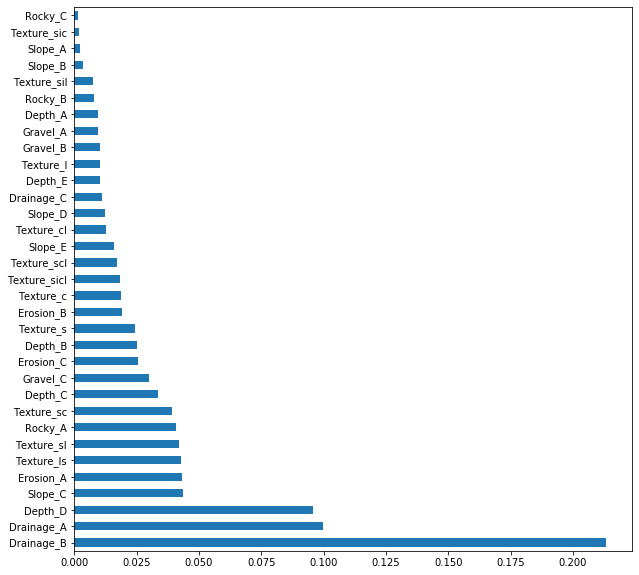

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(34).plot(kind='barh',figsize=(10,10))
plt.show()

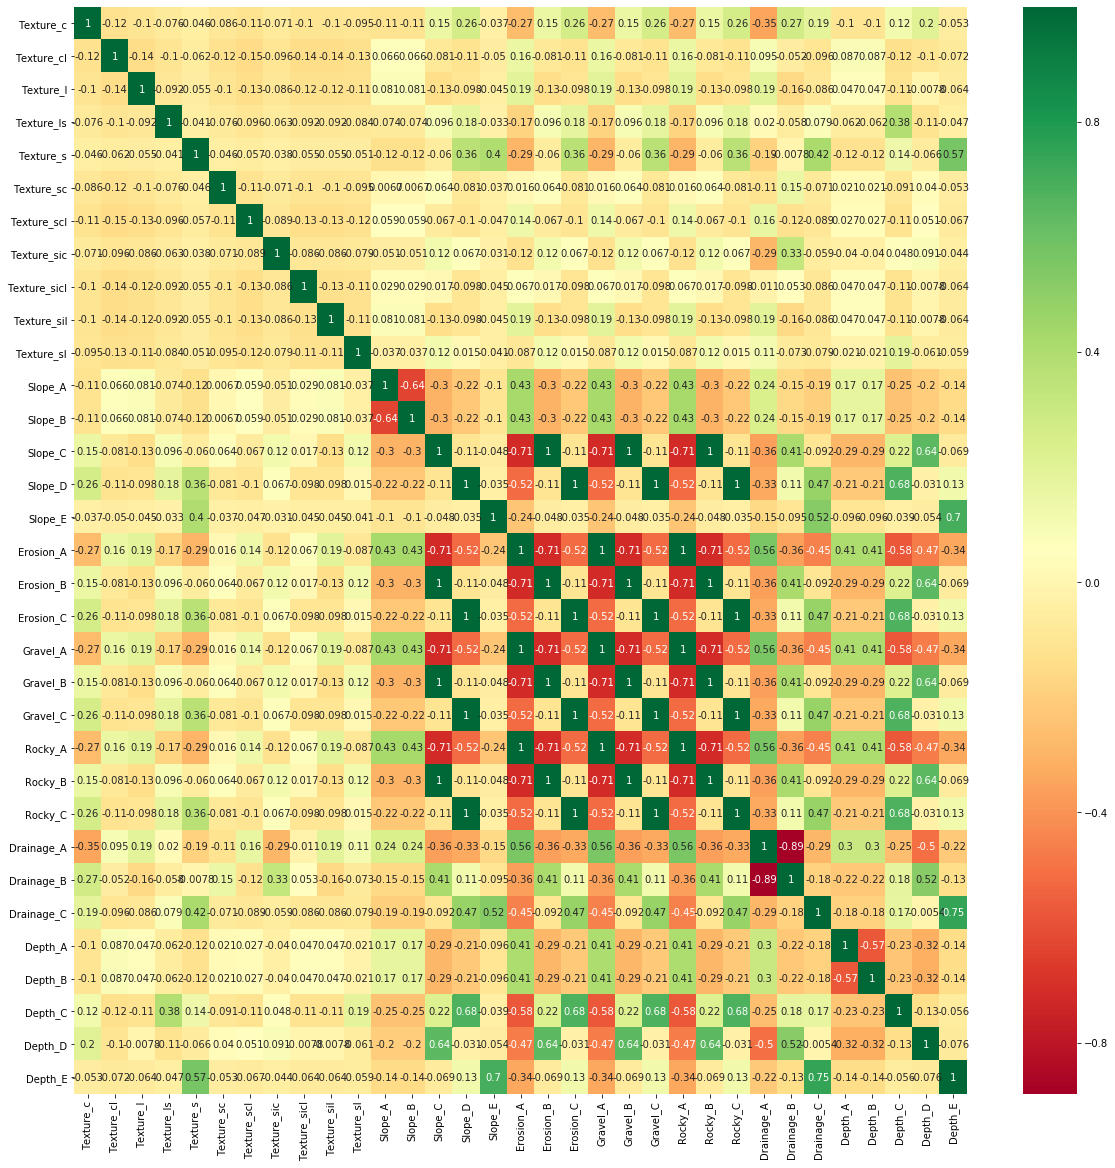

In [59]:
import seaborn as sns

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")